## Q1 

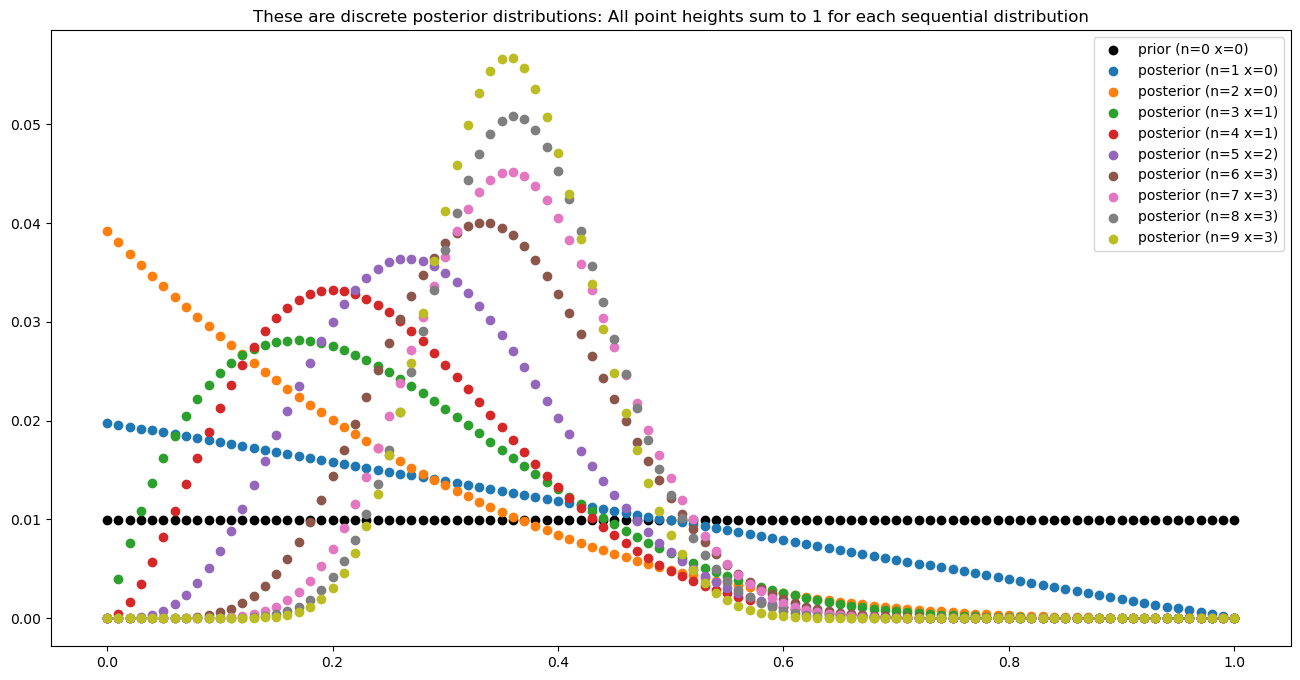

In [5]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    # use these for batch updates based on a binomial distribution
    likelihood = stats.binom.pmf(x, n, parameter_domain)
    
    # Compute posterior
    posterior = likelihood * prior  # Bayes' rule
    posterior /= posterior.sum()  # Normalize
    
    #or do updates in a truly sequential manner using Bernoulli
    prior = posterior
    
    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();

## Q2 

Fisrt of all,
the parameter $ \theta_j^{(t)} $ follows the Beta distribution given by
$\theta_j^{(t)} \sim \text{Beta}\Big(x_j^{(t)} + \alpha_j,\; n_j^{(t)} - x_j^{(t)} + \beta_j\Big)$

(*Note: From HW1, we confirmed that posterior distribution follows the family of prior distribution due to conjugacy. Since uniform distribution is a special case of the beta distribution where $\alpha=\beta=1$, they are belong to the same family)

Final counts and successes after 1000 iterations:
Arm 1 - Flips: 975, Successes: 669, Estimated θ1: 0.6861538461538461
Arm 2 - Flips: 25, Successes: 10, Estimated θ2: 0.4


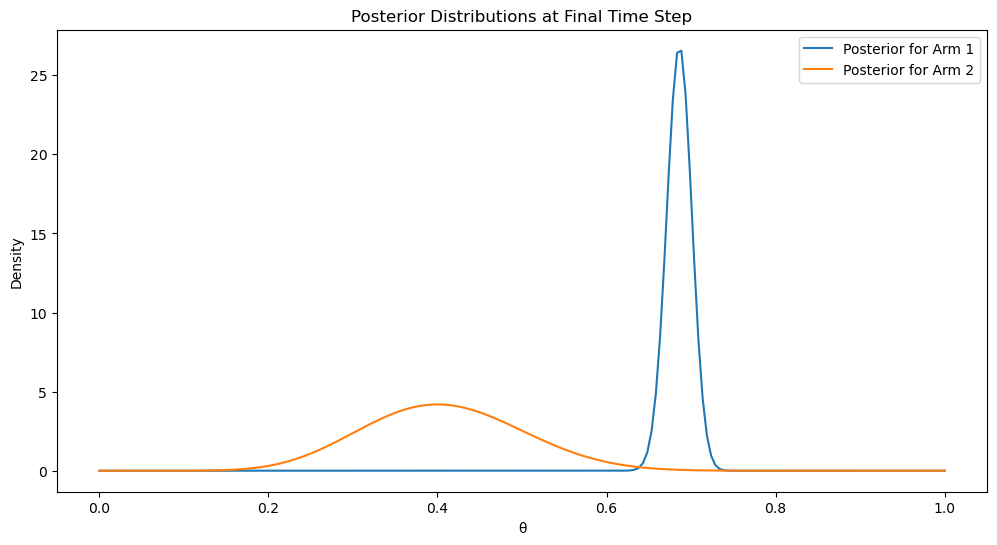

In [8]:
import numpy as np

# Initialize parameters
theta1_true = 0.7  # True probability of success for arm 1
theta2_true = 0.5  # True probability of success for arm 2

alpha1, beta1 = 1, 1  # Prior parameters for Beta distribution for arm 1
alpha2, beta2 = 1, 1  # Prior parameters for Beta distribution for arm 2

n1, x1 = 0, 0  # Initialize counts and successes for arm 1
n2, x2 = 0, 0  # Initialize counts and successes for arm 2

m = 1000  # Number of iterations

# To store data for visualization
prob_arm1_chosen = []
successes_arm1 = []
successes_arm2 = []
n1_history, n2_history = [], []

# Simulation loop
for t in range(m):
    # Sample from Beta distributions
    theta1_sample = np.random.beta(x1 + alpha1, n1 - x1 + beta1)
    theta2_sample = np.random.beta(x2 + alpha2, n2 - x2 + beta2)

    # Decide which arm to play
    if theta1_sample > theta2_sample:
        # Play arm 1
        n1 += 1
        if np.random.rand() < theta1_true:
            x1 += 1
    else:
        # Play arm 2
        n2 += 1
        if np.random.rand() < theta2_true:
            x2 += 1
    # Store data for visualization
    prob_arm1_chosen.append(theta1_sample / (theta1_sample + theta2_sample))
    successes_arm1.append(x1)
    successes_arm2.append(x2)
    n1_history.append(n1)
    n2_history.append(n2)

# Print final counts and successes
print(f"Final counts and successes after {m} iterations:")
print(f"Arm 1 - Flips: {n1}, Successes: {x1}, Estimated θ1: {x1 / n1 if n1 > 0 else 0}")
print(f"Arm 2 - Flips: {n2}, Successes: {x2}, Estimated θ2: {x2 / n2 if n2 > 0 else 0}")

theta_range = np.linspace(0, 1, 200)
posterior_arm1 = stats.beta.pdf(theta_range, x1 + alpha1, n1 - x1 + beta1)
posterior_arm2 = stats.beta.pdf(theta_range, x2 + alpha2, n2 - x2 + beta2)

plt.figure(figsize=(12, 6))
plt.plot(theta_range, posterior_arm1, label="Posterior for Arm 1")
plt.plot(theta_range, posterior_arm2, label="Posterior for Arm 2")
plt.xlabel("θ")
plt.ylabel("Density")
plt.title("Posterior Distributions at Final Time Step")
plt.legend()
plt.show()



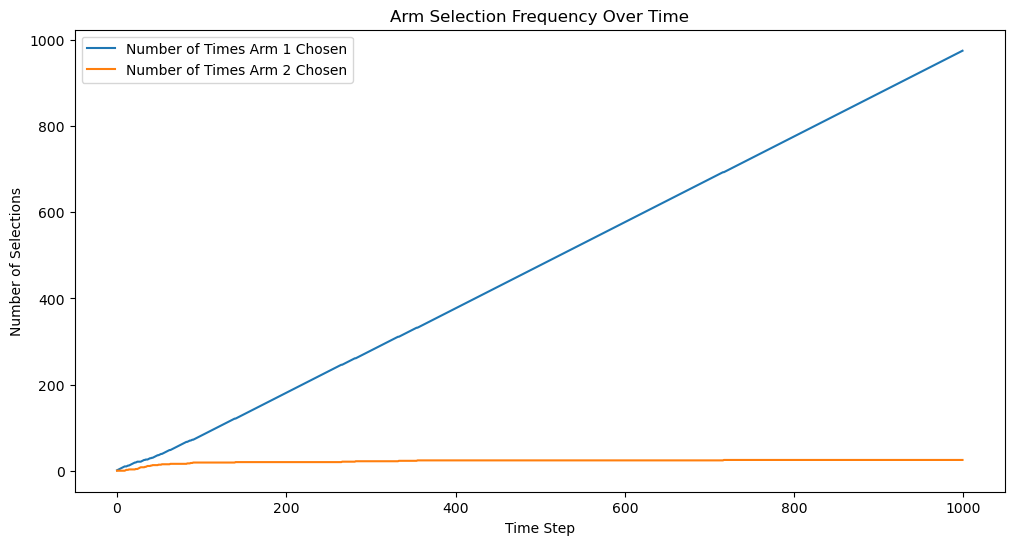

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(n1_history, label="Number of Times Arm 1 Chosen")
plt.plot(n2_history, label="Number of Times Arm 2 Chosen")
plt.xlabel("Time Step")
plt.ylabel("Number of Selections")
plt.title("Arm Selection Frequency Over Time")
plt.legend()
plt.show()

Since we set that $\theta_1=0.7$ and $\theta_2=0.5$, the number of selections (final counts) are extremely higher for $\theta_1$ than $\theta_2$. At the first stage, the number of selections for both arms are closer due to the exploration (the stage where the algorithm is uncertain about which arm is better). However, as the time step proceeds, the algorithm gathers sufficient data to estimate $\theta_1 > \theta_2$ (exploitation). 

(*Note: at the final stage, both posterior distributions for $\theta_1$ and $\theta_2$ are concentraed around the true value of $\theta_1$ and $\theta_2$)



## Q3

According to the question, there are three entities with binary outcomes, and we can use either independent binomial manner, or a single Dirichlet-multinomial model to analyze the data.

Let's assume that we conduct an AB testing for website design of a certain company. 

1. AB testing case 1. Similar layout, but different tool bars, color schemes or button placements.
2. AB testing case 2. Completely different layout (no shared feature between the designs).


For case 1, since we assume that three designs have similar layout, we need to use a single Dirichelt-multinomial model to account for the correlation between entities. 

For case 2, since three designs are completely different, we can use beta-independent binomial to estimate success probabilities of each entity. 

(*Note: for both cases, exploration-exploitation tradeoff is observed as the algorithm explores all designs in the first stage, and exploits the design with high success probability as it apporaches to the final stage.) 

Thus, the application of appropriate model for AB testing is based on the characteristics of entities in the real world.
(*Note: the Dirichlet-multinomial model could lead to an intense computation and cause a problem if there is no dependency between entities. Also, beta-independent binomial model could cause a problem if there is a dependency between entities. So, it is important to analyze entities before the testing.)
